In [6]:
import datasets  #(1.13.3)
import pandas as pd  #(0.25.1)
import numpy  #(1.16.4)
## for plotting
import matplotlib.pyplot as plt  #(3.1.2)
import seaborn as sns  #(0.9.0)
## for preprocessing
import re
import nltk  #(3.4.5)
import contractions  #(0.0.18)
## for textrank
import gensim  #(3.8.1)
## for evaluation
import rouge  #(1.0.0)
import difflib
## for seq2seq
from keras import callbacks, models, layers, preprocessing as kprocessing #(2.6.0)
## for bart
import transformers

In [7]:
df =  pd.read_csv('cnn_dataset/test.csv')

In [10]:
df.sh

(11490, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     11490 non-null  object
 1   highlights  11490 non-null  object
 2   id          11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


In [15]:
df.rename(columns={'article': 'text', 'highlights': 'y'}, inplace=True)

In [17]:
## create stopwords
lst_stopwords = nltk.corpus.stopwords.words("english")
## add words that are too frequent
lst_stopwords = lst_stopwords + ["cnn","say","said","new"]

## cleaning function
def utils_preprocess_text(txt, punkt=True, lower=True, slang=True, lst_stopwords=None, stemm=False, lemm=True):
    ### separate sentences with '. '
    txt = re.sub(r'\.(?=[^ \W\d])', '. ', str(txt))
    ### remove punctuations and characters
    txt = re.sub(r'[^\w\s]', '', txt) if punkt is True else txt
    ### strip
    txt = " ".join([word.strip() for word in txt.split()])
    ### lowercase
    txt = txt.lower() if lower is True else txt
    ### slang
    txt = contractions.fix(txt) if slang is True else txt   
    ### tokenize (convert from string to list)
    lst_txt = txt.split()
    ### stemming (remove -ing, -ly, ...)
    if stemm is True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_txt = [ps.stem(word) for word in lst_txt]
    ### lemmatization (convert the word into root word)
    if lemm is True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_txt = [lem.lemmatize(word) for word in lst_txt]
    ### remove Stopwords
    if lst_stopwords is not None:
        lst_txt = [word for word in lst_txt if word not in 
                   lst_stopwords]
    ### back to string
    txt = " ".join(lst_txt)
    return txt

## apply function to both text and summaries
df["text_clean"] = df["text"].apply(lambda x: utils_preprocess_text(x, punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, stemm=False, lemm=True))
df["y_clean"] = df["y"].apply(lambda x: utils_preprocess_text(x, punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, stemm=False, lemm=True))

,text,y,id,text_clean,y_clean
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01,cnnthe palestinian authority officially became...,membership give icc jurisdiction alleged crime...
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef,cnnnever mind cat nine life stray pooch washin...,theia bully breed mix wa apparently hit car wh...
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69,cnnif following news lately certain thing doub...,mohammad javad zarif ha spent time john kerry ...
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca,cnnfive american monitored three week omaha ne...,17 american exposed ebola virus sierra leone m...
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f,cnna duke student ha admitted hanging noose ma...,student longer duke university campus face dis...
...,...,...,...,...,...
11485,Telecom watchdogs are to stop a rip-off that a...,Operators are charging up to 20p a minute - ev...,0ac776a4dc09ca97c136f4314fed4defb48a361a,telecom watchdog stop ripoff allows mobile pho...,operator charging 20p minute even 0800 number ...
11486,The chilling reenactment of how executions are...,Bali Nine ringleaders will face the firing squ...,fe89a6a2e28d173e5ad4c6d814c15b95aa969e3f,chilling reenactment execution carried indones...,bali nine ringleader face firing squad midnigh...
11487,It is a week which has seen him in deep water ...,Hardy was convicted of domestic abuse against ...,ded2f535cd6ab95d11b5f4ea29bbf2b2d3c55c50,week ha seen deep water pitch day dallas cowbo...,hardy wa convicted domestic abuse exgirlfriend...
11488,"Despite the hype surrounding its first watch, ...",Apple sold more than 61 million iPhones in the...,30ec5f280eee772a73d181bfc8514defd8026434,despite hype surrounding first watch iphone st...,apple sold 61 million iphones quarter apple re...


f:\deeplearning_project\dl_project\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
f:\deeplearning_project\dl_project\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

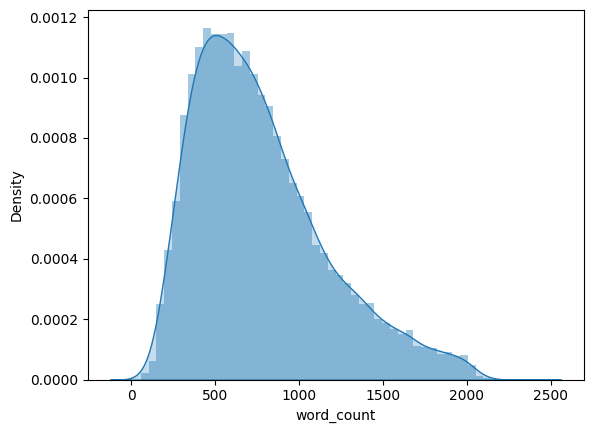

In [21]:
## count
df['word_count'] = df["text"].apply(lambda x: len(nltk.word_tokenize(str(x))) )
## plot
sns.distplot(df["word_count"], hist=True, kde=True, kde_kws={"shade":True})

f:\deeplearning_project\dl_project\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


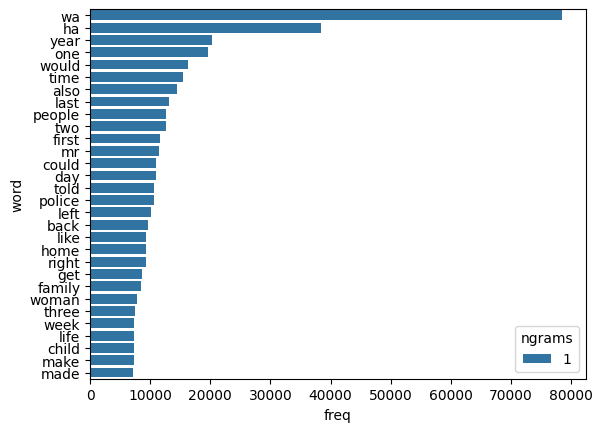

In [23]:
lst_tokens = nltk.tokenize.word_tokenize(df["text_clean"].str.cat(sep=" "))
ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending=
                         [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()